In [19]:
def plot_figures_lr(lrs):
    plt.figure(figsize=(15,5))
    for lr in lrs:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(lrs)
    plt.tight_layout()
    plt.show()

def plot_figures_batch_sizes(batch_sizes):
    plt.figure(figsize=(15,5))
    for batch_size in batch_sizes:
        directory = get_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        #plt.semilogy(cur_epochs, train_graphs.eigs)
        plt.plot(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.semilogy(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(batch_sizes)
    plt.tight_layout()
    plt.show()

In [5]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{loss_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/moment_{momentum}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_running_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **kwargs):
    return get_lookup_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"

def get_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/run_0/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sgd --lr 0.001 --epoch 4000 --analysis loss eigs --batch_size 512

results/cifar/sgd/resnet18/lr_0.001/wd_0/batch_size_512/epoch_2000/
results/cifar/sgd/resnet18/lr_0.002/wd_0/batch_size_512/epoch_2000/
results/cifar/sgd/resnet18/lr_0.004/wd_0/batch_size_512/epoch_2000/


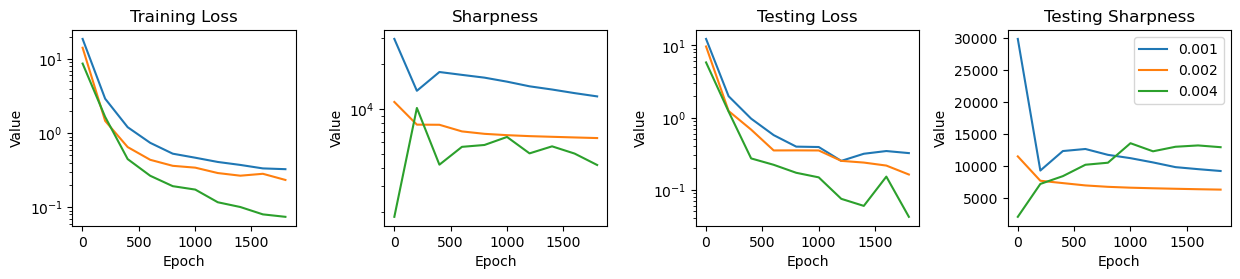

In [44]:
dataset_name, opt_name, weight_decay, batch_size, epochs = "cifar", "sgd", 0, 512, 2000
model_name = "resnet18"
model_params = {}

plot_figures_lr([0.001, 0.002, 0.004])

results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_128/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_256/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_512/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_1024/epoch_2000/run_0/


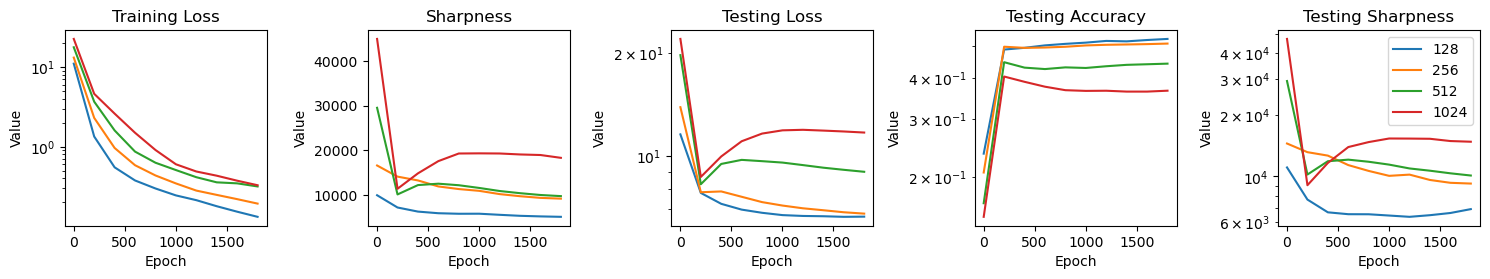

In [36]:
dataset_name, opt_name, momentum, weight_decay, batch_size, lr, epochs = "cifar", "sgd", 0, 0, 512, 0.001, 2000
model_name = "resnet18"
model_params = {}

#plot_figures_batch_sizes([512, 1024])
plot_figures_batch_sizes([128, 256, 512, 1024])

results/cifar/sgd/resnet18/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_2000/run_0/


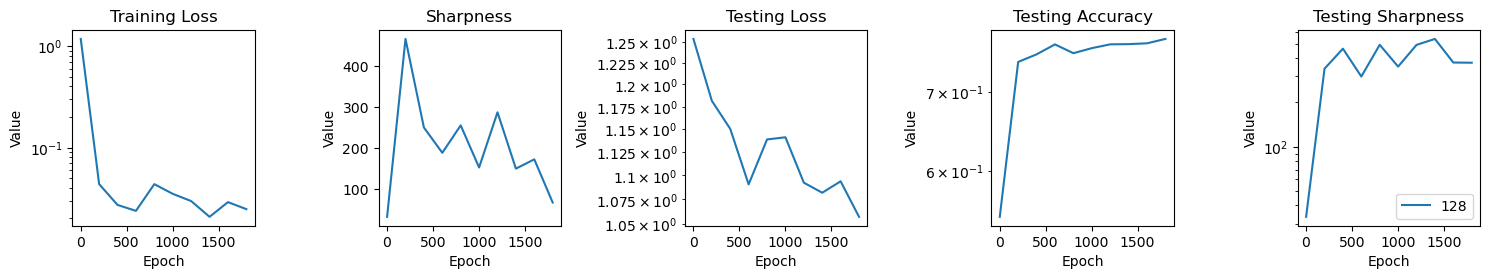

In [37]:
loss_name = 'CrossEntropyLoss'
lr, dataset_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0.9, 5e-4, 128, 2000
model_name = "resnet18"

plot_figures_batch_sizes([128])

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sgd --lr 0.001 --epoch 4000 --analysis loss eigs --batch_size 512 --multiple_run 1 --store_model_checkpoint 1

Text(0.5, 1.0, 'Training Loss')

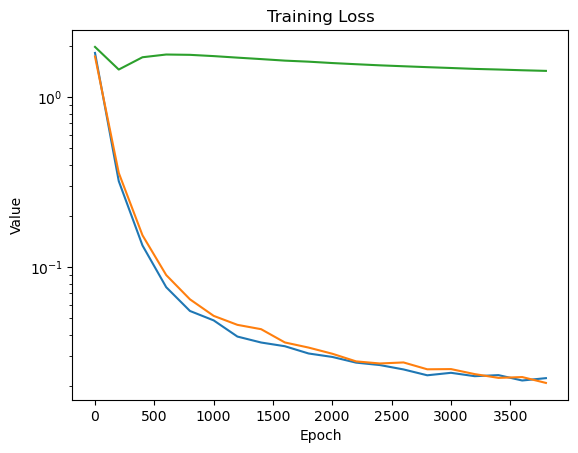

: 

In [11]:
loss_name = 'MSELoss'
lr, dataset_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "cifar", "sgd", 0, 0, 512, 4000
model_name = "resnet18"

directory = get_running_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs)

for run in [1,2]:
    with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
        train_graphs = pickle.load(f)
    cur_epochs = train_graphs.log_epochs
    plt.semilogy(cur_epochs, train_graphs.loss)
#plt.legend(['Loss + Weight Decay'])
with open(f'../{directory}avg_{12}/eval_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
cur_epochs = train_graphs.log_epochs
plt.semilogy(cur_epochs, train_graphs.loss)    

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss')

In [ ]:
! python main.py --dataset multi-view --model conv_with_last --loss MSELoss --opt sgd --lr 0.0005 --epoch 16000 --log_interval 50 --analysis loss eigs align --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --width 2

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_20/feat_dim_200/train_size_512/lr_0.0005/moment_0/wd_0/batch_size_512/epoch_32000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_20/feat_dim_200/train_size_512/lr_0.002/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


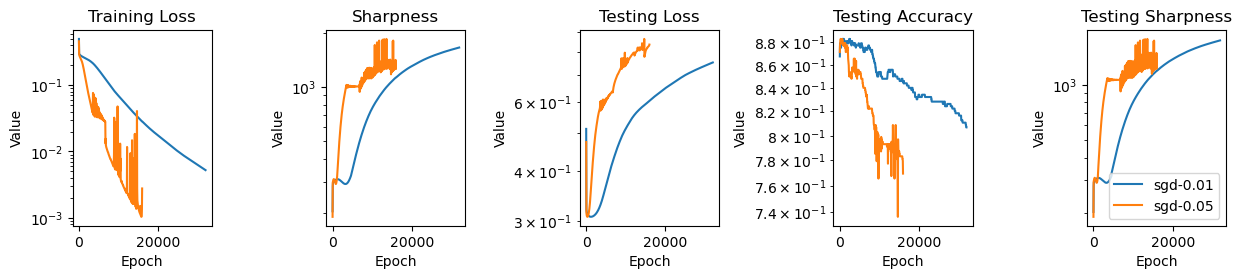

In [20]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 16000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 2, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.002, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0005, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':32000}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.01',"sgd-0.05"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_20/feat_dim_200/train_size_512/lr_0.002/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


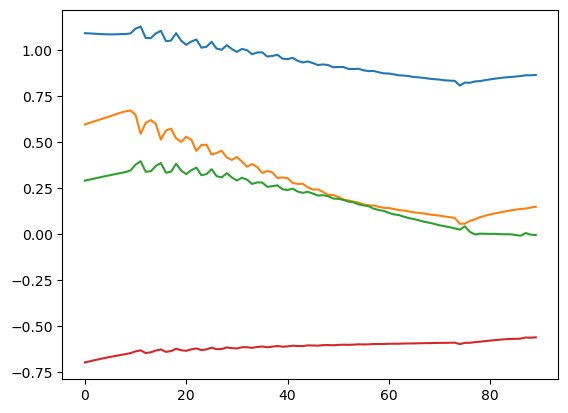

In [2]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.05', model_params, opt_params, "align")
#plot_max_2d(align, 4, start=0, end=-1)
plot_max_2d(align, 4, start=60, end=150)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_1/patch_dim_20/feat_dim_200/train_size_512/lr_0.0008/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


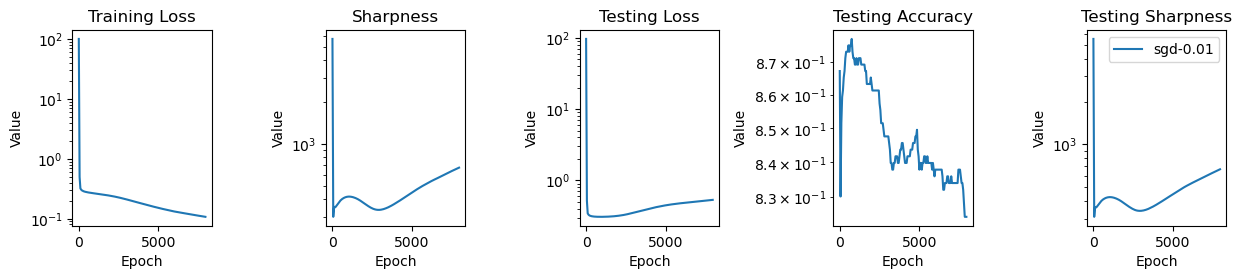

In [31]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 1, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.002, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0008, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.01'], model_params, opt_params)